# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
import time
from imutils import improcess
from imutils import implot


import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten

# Load pickled data
import pickle
import os
import numpy as np
from IPython import display
from sklearn.utils import shuffle
from sklearn import model_selection


In [2]:
root_dir =  os.path.dirname(os.path.realpath("__file__"))
print(root_dir)
# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join(root_dir,'traffic-signs-data/train.p')
# validation_file= 
testing_file = 'traffic-signs-data/test.p'

sign_names_file = 'signnames.csv'

/home/mandar/projects/mandarup/dl-courses/udacity-CarND/CarND-Traffic-Sign-Classifier-Project


In [3]:



with open(training_file, mode='rb') as f:
    train = pickle.load(f)
# with open(validation_file, mode='rb') as f:
#     valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    


In [24]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [25]:


X_train, X_validation, y_train, y_validation = model_selection.train_test_split(
    X_train, y_train, test_size=.4, random_state=0, stratify=y_train)

X_validation, X_dev, y_validation, y_dev = model_selection.train_test_split(
    X_validation, y_validation, test_size=.5, random_state=0, stratify=y_validation)
print("train shape {}".format(X_train.shape))
print("dev shape {}".format(X_dev.shape))
print("valid shape {}".format(X_validation.shape))

print("label distribution: \n\t{}".format(np.bincount(y_train)/np.bincount( train['labels'])))
print("label distribution: \n\t{}".format(np.bincount(y_validation)/np.bincount( train['labels'])))
print("label distribution: \n\t{}".format(np.bincount(y_dev)/np.bincount( train['labels'])))
# print("label distribution: \n\t{}".format(np.bincount(y_test)/np.bincount( train['labels'])))

train shape (23525, 32, 32, 3)
dev shape (7842, 32, 32, 3)
valid shape (7842, 32, 32, 3)
label distribution: 
	[ 0.6         0.6         0.6         0.6         0.6         0.6         0.6
  0.6         0.6         0.6         0.6         0.6         0.6         0.6
  0.6         0.6         0.6         0.6         0.6         0.6         0.6
  0.6         0.6         0.6         0.6         0.6         0.6         0.6
  0.6         0.6         0.6         0.6         0.6         0.59941945
  0.6         0.6         0.6         0.6         0.6         0.6         0.6
  0.6         0.6       ]
label distribution: 
	[ 0.2         0.2         0.2         0.2         0.2         0.2         0.2
  0.2         0.2         0.2         0.2         0.2         0.2         0.2
  0.2         0.2         0.2         0.2         0.2         0.2         0.2
  0.2         0.2         0.2         0.2         0.2         0.2         0.2
  0.2         0.2         0.2         0.2         0.2         0.20

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

38


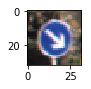

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [45]:
def get_signnames(y):
    """returns label names.
    
    """
    # read signnames
    signnames = pd.read_csv(sign_names_file)
    classid = pd.DataFrame(y,columns=["ClassId"])
    labels_df = pd.merge(classid, signnames, how='left')
    print(labels_df.shape, classid.shape)
    #labels_df.SignName
    labels_df['label'] = (labels_df.ClassId.astype(str)
                          + "-"
                          + labels_df.SignName.astype(str))
    return labels_df


(23525, 2) (23525, 1)


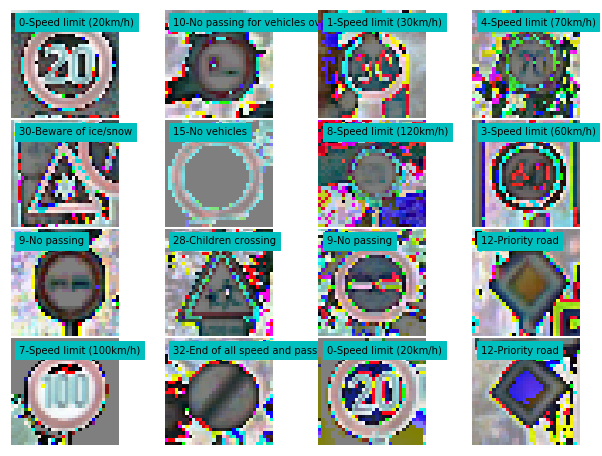

In [47]:
for i in range(10):
    display.clear_output(wait=True)
    implot.plot_random_image_matrix(4,4,X_train,get_signnames(y_train).label)
#     implot.plot_random_image_matrix(4,4,X_test,get_signnames(y_test).label)
    time.sleep(3)

In [29]:
def apply_image_processing(X):
    return np.array([improcess.pre_process_image(X[i]) for i in range(len(X))],
                          dtype = np.float32)

X_train = apply_image_processing(X_train)
X_validation = apply_image_processing(X_validation)
X_dev = apply_image_processing(X_dev)
X_test = apply_image_processing(X_test)

In [30]:

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [31]:
import tensorflow as tf

EPOCHS = 10000
BATCH_SIZE = 256
N_CLASSES = 43
COLOR_CHANNELS = 3

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [32]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, 
                     W, 
                     strides=[1,strides,strides,1],
                     padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
                x,
                ksize=[1,k,k,1],
                strides=[1,k,k,1],
                padding='VALID')

In [33]:
5*5*16*3


1200

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [48]:
x = tf.placeholder(tf.float32, (None, 32, 32, COLOR_CHANNELS))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, N_CLASSES)

keep_prob = tf.placeholder(tf.float32)
learning_rate = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [50]:
5*5*64

1600

In [51]:
rate = 0.0001
dropout = 0.5

mu = 0
sigma = 0.1


weights = {'1c': tf.Variable(tf.truncated_normal((5,5,COLOR_CHANNELS,32), mu, sigma)),
           '2c': tf.Variable(tf.truncated_normal((5,5,32,64), mu, sigma)),
           '3d': tf.Variable(tf.truncated_normal(shape=(5*5*64, 512), mean=mu, stddev=sigma)),
           '4d': tf.Variable(tf.truncated_normal((512, 512), mu, sigma)),
           '5out': tf.Variable(tf.truncated_normal((512, N_CLASSES), mu, sigma)),

}

biases  = {'1c': tf.Variable(tf.zeros(32)),
          '2c': tf.Variable(tf.zeros(64)),
           '3d':tf.Variable(tf.zeros(512)),
           '4d':tf.Variable(tf.zeros(512)),
           '5out':tf.Variable(tf.zeros(N_CLASSES)),

       }

# TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
# TODO: Activation.
# TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = conv2d(x, weights['1c'], biases['1c'], strides=1)
conv1 = tf.nn.relu(conv1)
conv1 = maxpool2d(conv1, k=2)

# TODO: Layer 2: Convolutional. Output = 10x10x16.
# TODO: Activation.
# TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
print(weights['2c'])
conv2 = conv2d(conv1, weights['2c'], biases['2c'], strides=1)
conv2 = tf.nn.relu(conv2)
conv2 = maxpool2d(conv2, k=2)


# TODO: Flatten. Input = 5x5x16. Output = 400.
# TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
fc0   = flatten(conv2)
fc3 = tf.add(tf.matmul(fc0, weights['3d']), biases['3d'])
fc3 = tf.nn.relu(fc3)
fc3 = tf.nn.dropout(fc3, dropout)

# TODO: Activation.
# TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
# TODO: Activation.
fc4 = tf.add(tf.matmul(fc3, weights['4d']), biases['4d'])
fc4 = tf.nn.relu(fc4)
fc4 = tf.nn.dropout(fc4, dropout)


# TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
logits = tf.add(tf.matmul(fc4, weights['5out']), biases['5out'])


for k,v in weights.items():
    print(k, v.get_shape().as_list())

# print(conv2.get_shape().as_list())
# print(fc0.get_shape().as_list())

Tensor("Variable_31/read:0", shape=(5, 5, 32, 64), dtype=float32)
2c [5, 5, 32, 64]
5out [512, 43]
4d [512, 512]
3d [1600, 512]
1c [5, 5, 3, 32]


In [52]:

regularizers = sum([tf.nn.l2_loss(w) for w in weights.values()])

# logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + 1e-6 * regularizers
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation) 

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [53]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [54]:
from collections import deque

TARGET_ACCURACY = .99
start_time = time.time()
best_valid_accuracy = 0
valid_accuracy_q = deque(maxlen=10)
train_accuracy_q = deque(maxlen=3)
l_rate = .001

best_accuracy = 0
train_accuracy_q.append(0)

continue_training = False

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    if continue_training:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        batch_accuracy = []
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, 
                                                    keep_prob:dropout,
                                                   learning_rate: l_rate})
            
            batch_accuracy.append(evaluate(batch_x, batch_y))
            
        
                                  
        train_accuracy = np.mean(batch_accuracy)                        
        validation_accuracy = evaluate(X_validation, y_validation)
        
        if best_accuracy < train_accuracy:
            best_accuracy = train_accuracy
        
        
        if i > 3  and (np.mean(train_accuracy_q) >= train_accuracy  or best_accuracy - train_accuracy > .001):
            l_rate = l_rate * .9
            print('updating learning rate {}'.format(l_rate))
        
        valid_accuracy_q.append(validation_accuracy)
        train_accuracy_q.append(train_accuracy)
        if validation_accuracy > best_valid_accuracy:
            best_valid_accuracy = validation_accuracy
        print("EPOCH {} Accuracy - Training {:.3f}, Valid {:.3f}, AvgEpochTime {:.2f} s, TotalTime {:.2f} min, l_rate {:.4f}"
              .format(i+1, train_accuracy, validation_accuracy, 
                      (time.time() - start_time)/(i+1), 
                      (time.time() - start_time)/60.,l_rate)
                      )
        if (i % 5 ==0 or i == EPOCHS -1) & i > 0:
            saver.save(sess, './lenet')
            print("Model saved")
        if validation_accuracy > TARGET_ACCURACY:
            saver.save(sess, './lenet')
            print("Model saved")
            print('Target accuracy reached!')
            break
        if ((len(valid_accuracy_q) == 10 and np.max(list(valid_accuracy_q)[-5:]) < best_valid_accuracy - .01)
            or train_accuracy == 1.):
            saver.save(sess, './lenet')
            print("Model saved")
            print('Overfit!!')
            break
            

#         try:
#             acc_grad = zip(list(valid_accuracy_q), list(valid_accuracy_q)[1:])
#             print(list(acc_grad))
#             acc_grad = [ z[1]-z[0] for z in acc_grad]
#             print(acc_grad)
#             if acc_grad[-1] <= acc_grad[-2] +.0001:
#                 l_rate -= .0001
#                 #print('updating learning rate to {:.4f}'.format(l_rate))
#         except Exception as e:
#             print(str(e))
        

Training...

EPOCH 1 Accuracy - Training 0.329, Valid 0.550, AvgEpochTime 21.18 s, TotalTime 0.35 min, l_rate 0.0010
EPOCH 2 Accuracy - Training 0.676, Valid 0.763, AvgEpochTime 20.66 s, TotalTime 0.69 min, l_rate 0.0010
EPOCH 3 Accuracy - Training 0.826, Valid 0.862, AvgEpochTime 20.67 s, TotalTime 1.03 min, l_rate 0.0010
EPOCH 4 Accuracy - Training 0.892, Valid 0.897, AvgEpochTime 20.61 s, TotalTime 1.37 min, l_rate 0.0010
EPOCH 5 Accuracy - Training 0.926, Valid 0.924, AvgEpochTime 20.54 s, TotalTime 1.71 min, l_rate 0.0010
EPOCH 6 Accuracy - Training 0.946, Valid 0.939, AvgEpochTime 20.40 s, TotalTime 2.04 min, l_rate 0.0010
Model saved
EPOCH 7 Accuracy - Training 0.957, Valid 0.950, AvgEpochTime 20.48 s, TotalTime 2.39 min, l_rate 0.0010
EPOCH 8 Accuracy - Training 0.966, Valid 0.950, AvgEpochTime 20.59 s, TotalTime 2.75 min, l_rate 0.0010
EPOCH 9 Accuracy - Training 0.971, Valid 0.960, AvgEpochTime 20.77 s, TotalTime 3.12 min, l_rate 0.0010
EPOCH 10 Accuracy - Training 0.979, Val

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [70]:
import math
def get_activations(sess,layer,stimuli):
    units = sess.run(layer,feed_dict={x: stimuli,keep_prob:1.0})
    plot_filter(units)
    
def plot_filter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

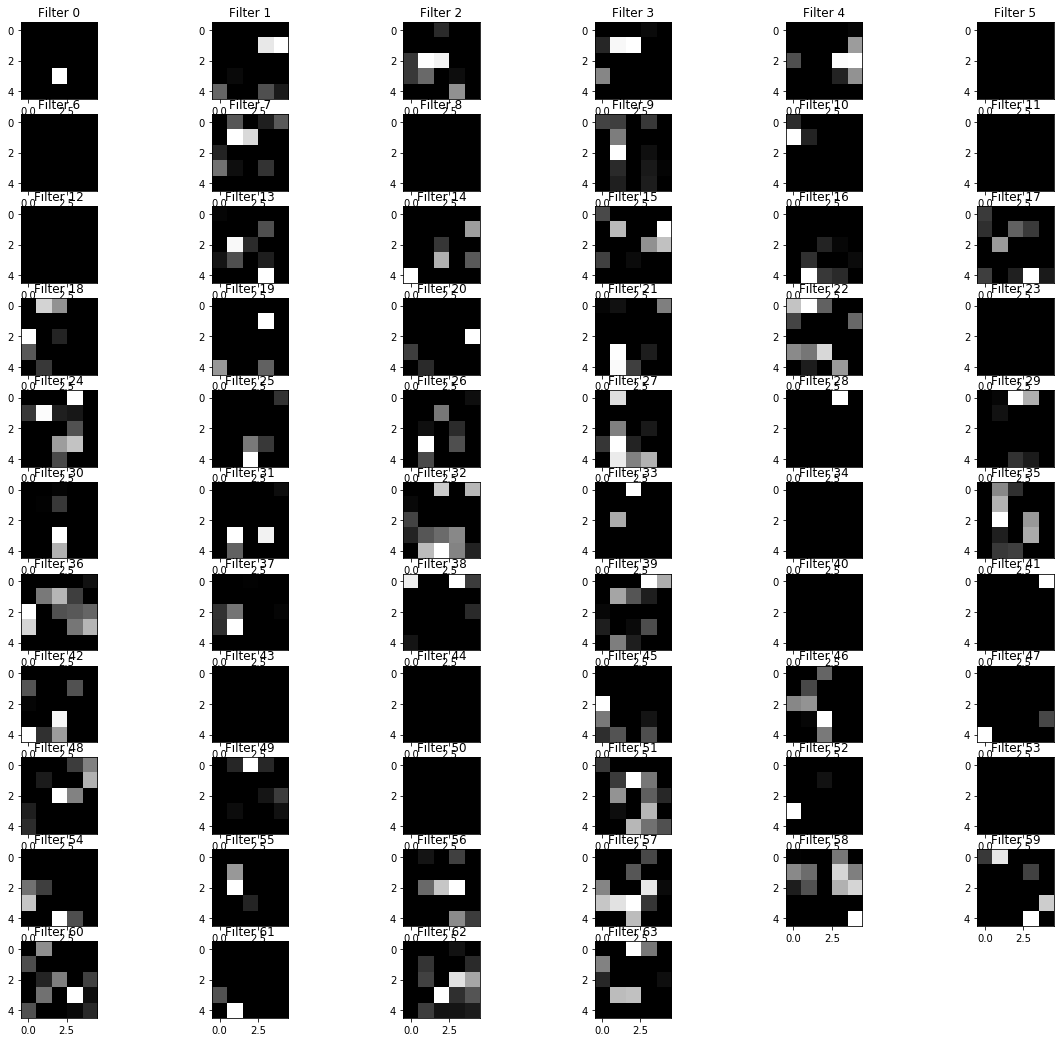

In [74]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
#     get_activations(sess,conv1,X_dev[0:1])
    get_activations(sess,conv2,X_dev[0:4])
    

In [75]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    dev_accuracy = evaluate(X_dev, y_dev)
    print("Test Accuracy = {:.3f}".format(dev_accuracy))
    
    

Test Accuracy = 0.991


In [76]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.951
